In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('insurancee(data1).csv')

In [3]:
data.describe()

,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


In [4]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
# smoke = data.smoker.map(dict(yes=1, no=0))
# data['nsmoker'] = smoke
# data.drop('smoker',axis=1,inplace=True)
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
2767,47,female,45.320,1,no,southeast,8569.86180
2768,21,female,34.600,0,no,southwest,2020.17700
2769,19,male,26.030,1,yes,northwest,16450.89470
2770,23,male,18.715,0,no,northwest,21595.38229


# Preprocessing

## 1. Checking if there are any NULL values

##### -> we can see there are no NULL values thus no need to use imputer
#####    but will add in the pipeline so that if new data is inserted
#####    the it can deal with some Null values

In [6]:
from sklearn.impute import SimpleImputer

data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## 2. Scaling of data
##### ->Here scaling is not needed as the model is a regression 
##### model but will be adding the Scaler into the pipeline

## 3. checking imbalanced data

C:\Users\Kinshuk\AppData\Local\Temp\ipykernel_18320\685611743.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 4, i + 1)


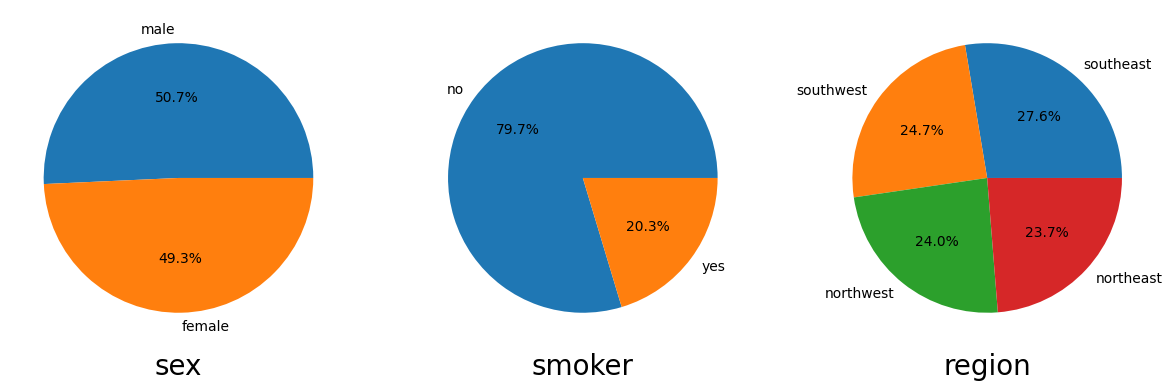

In [7]:
features = ['sex', 'smoker', 'region']
  
plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
    plt.subplot(1, 4, i + 1)
  
    x = data[col].value_counts()
    plt.pie(x.values,
            labels=x.index,
            autopct='%1.1f%%')
    plt.xlabel(col,fontsize = 20)
  
plt.show()

### Here an imbalance in the percentages of Smoker's chart is visible(middle)
### That is why we use Stratified-Shuffle-split to remove the imbalance


## 4.Finding Outliers

C:\Users\Kinshuk\AppData\Local\Temp\ipykernel_18320\1663181701.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 3, i + 1)


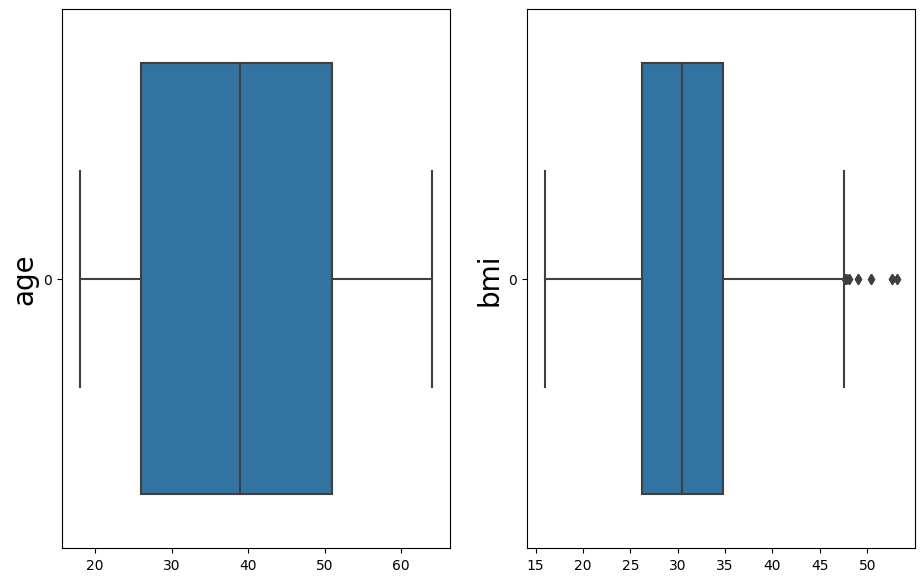

In [8]:
features = ['age', 'bmi']
  
plt.subplots(figsize=(17, 7))
for i, col in enumerate(features):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(data[col], orient="h")
    plt.ylabel(col,fontsize = 20)
plt.show()

#### Here we can see some outliers in BMI so lets check their count

In [9]:
data.shape, data[data['bmi']<45].shape
#very less values so we can discard them

((2772, 7), (2728, 7))

In [10]:
data = data[data['bmi']<45]
data.reset_index(drop=True,inplace=True)

### Analysis and plotting data

C:\Users\Kinshuk\AppData\Local\Temp\ipykernel_18320\1240718293.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, i + 1)


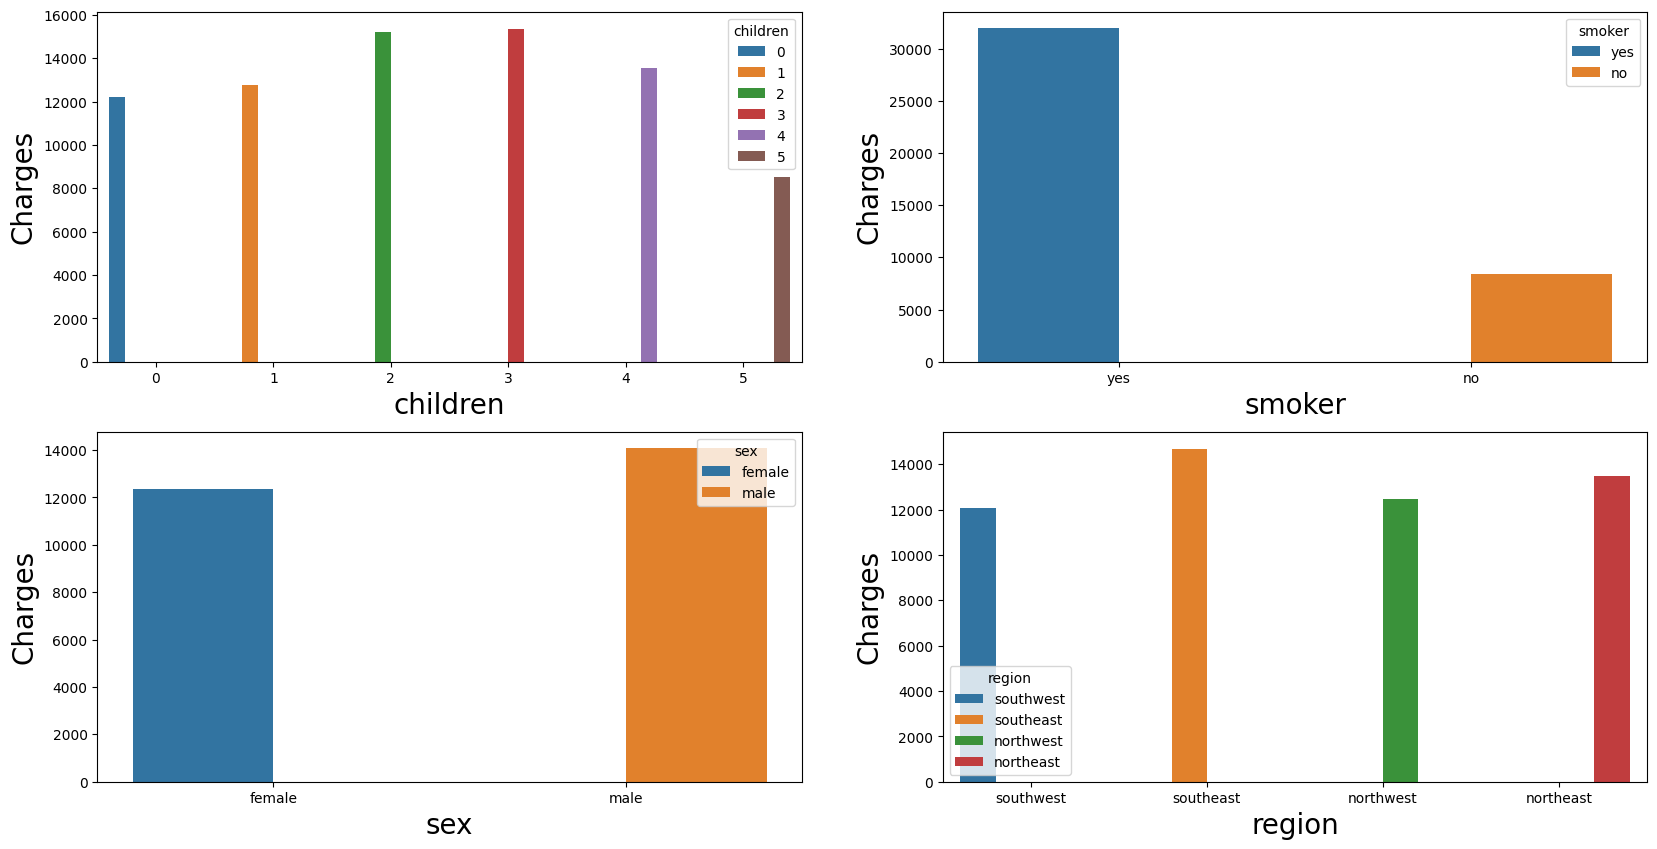

In [11]:
features = ['children', 'smoker','sex','region']
  
plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
    plt.subplot(2, 2, i + 1)
    sns.barplot(data=data,x=col,y='charges',hue=col,errorbar=('ci',0),width=0.8)
    plt.xlabel(col,fontsize = 20)
    plt.ylabel('Charges',fontsize = 20)
plt.show()

#### Analysis from the plotted bars
1. Charges are on the higher side for males as compared to females but the difference is not that much.
2. Premium charged from the smoker is very high as compared to the premium charged from non-smokers.
3. Charges are approximately the same in the given four regions.

C:\Users\Kinshuk\AppData\Local\Temp\ipykernel_18320\538050994.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, i + 1)


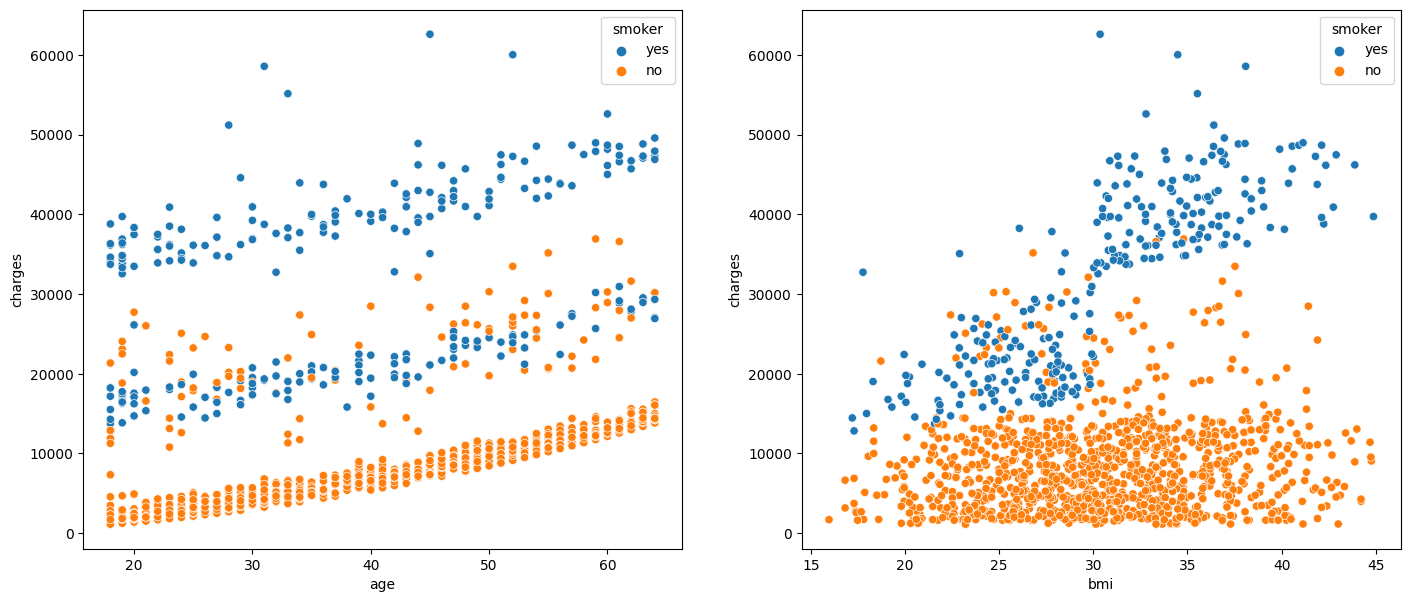

In [12]:
features = ['age', 'bmi']
  
plt.subplots(figsize=(17, 7))
for i, col in enumerate(features):
    plt.subplot(1, 2, i + 1)
    sns.scatterplot(data=data, x=col,
                   y='charges',
                   hue='smoker')
plt.show()

#### Analysis from the Scatter Plot
1. A clear distinction can be observed here between the charges that smokers have to pay. 
2. Here we can observe that as the age of a person increases premium prices goes up as well.

### 5. Converting Categorical into numerical data

In [13]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

data['sex'] = le.fit_transform(data['sex'])
data['region'] = le.fit_transform(data['region'])
data['smoker'] = le.fit_transform(data['smoker'])

C:\Users\Kinshuk\AppData\Local\Temp\ipykernel_18320\3046248202.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sex'] = le.fit_transform(data['sex'])
C:\Users\Kinshuk\AppData\Local\Temp\ipykernel_18320\3046248202.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['region'] = le.fit_transform(data['region'])
C:\Users\Kinshuk\AppData\Local\Temp\ipykernel_18320\3046248202.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

In [14]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


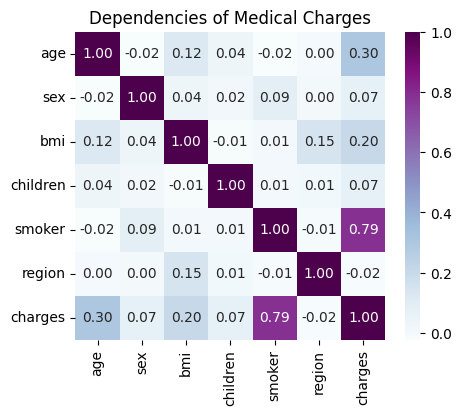

In [15]:
corr = data.corr()
fig= plt.subplots(figsize=(5,4))
sns.heatmap(corr,cmap='BuPu',annot=True,fmt=".2f")
plt.title("Dependencies of Medical Charges")
plt.show()

In [16]:
## removing some features that will not help in prediction of Cost

data.drop('region',axis=1,inplace=True)

C:\Users\Kinshuk\AppData\Local\Temp\ipykernel_18320\3576641964.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop('region',axis=1,inplace=True)


In [17]:
data.head()

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520


### 6. Splitting test train data

In [18]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1,test_size=0.33,random_state=42) 

for train_index,test_index in split.split(data,data['smoker']):    #solving imbalance in smoker
    train_set = data.loc[train_index]
    test_set = data.loc[test_index]
    

In [19]:
#only leaving features in X and labels in Y

X_train = train_set.drop('charges',axis=1)
X_test =  test_set.drop('charges',axis=1)
y_train = train_set['charges'].copy()
y_test = test_set['charges'].copy()

In [20]:
#Just to check jo smoker mai yes and no wale counts hai in train and test vo same proportion mai hai ya nahi
a = X_train['smoker'].value_counts()
train_ratio = a[0]/a[1]

b = X_test['smoker'].value_counts()
test_ratio = b[0]/b[1]

print(f"Smoker ratio in Train data : {train_ratio}\nSmoker ratio in Test Data : {test_ratio}")

Smoker ratio in Train data : 3.9245283018867925
Smoker ratio in Test Data : 3.9234972677595628


# Training the models


In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [22]:
X_train.head()

,age,sex,bmi,children,smoker
221,32,1,30.80,3,0
295,31,1,34.39,3,1
1780,64,1,33.88,0,1
507,19,1,30.40,0,0
32,19,0,28.60,5,0


In [23]:
lr=LinearRegression()
model = lr.fit(X_train,y_train)

In [24]:
y_predicted = model.predict(X_test)

In [25]:
model.score(X_test,y_test)

0.7545607119725041

In [26]:
error = []
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error,r2_score
import numpy as np

#MAE
mae = mean_absolute_error(y_test,y_predicted)
error.append(mae)

#MAPE
mape = mean_absolute_percentage_error(y_test,y_predicted)
error.append(mape)

#r2
rs = r2_score(y_test,y_predicted)
error.append(rs)
error

[4138.880273346318, 0.42526750917140027, 0.7545607119725041]

In [27]:
err = pd.DataFrame(error).T
err.columns=['MAE','MAPE','R2']
err

,MAE,MAPE,R2
0,4138.880273,0.425268,0.754561


In [28]:
adR2 = 1- ( ((1-rs) * (670-1)) / (670-1-10))
adR2

0.7508362918203417

In [29]:
## For train
pred1_tr = model.predict(X_train)

error = []
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error,r2_score
import numpy as np

#MAE
mae = mean_absolute_error(y_train,pred1_tr)
error.append(mae)

#MAPE
mape = mean_absolute_percentage_error(y_train,pred1_tr)
error.append(mape)

#r2
rs = r2_score(y_train,pred1_tr)
error.append(rs)

err = pd.DataFrame(error).T
err.columns=['MAE','MAPE','R2']
err

,MAE,MAPE,R2
0,4205.077442,0.439646,0.745763


In [30]:
adR2 = 1- ( ((1-rs) * (670-1)) / (670-1-10))
adR2

0.7419054146578807

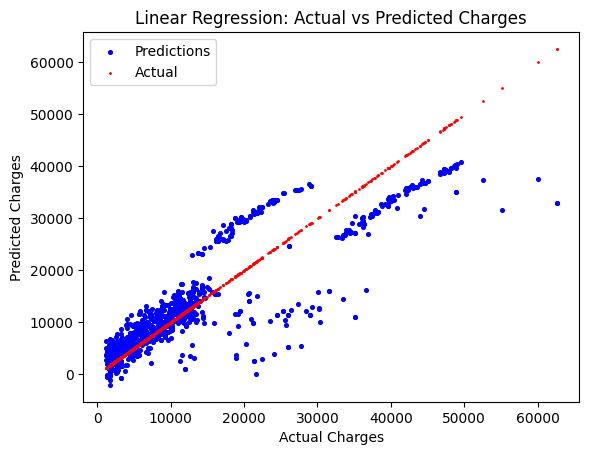

In [31]:
plt.scatter(y_test, y_predicted, color='blue', label='Predictions', s=7)
plt.scatter(y_test, y_test, color='red', label='Actual',s=1)

plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Linear Regression: Actual vs Predicted Charges')
plt.legend()
plt.show()

### Random Forest


In [32]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(random_state = 0)
model1 = regressor.fit(X_train, y_train)

In [33]:
predrandom = model1.predict(X_test)

In [34]:
error2 = []
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error,r2_score
import numpy as np

#MAE
mae = mean_absolute_error(y_test,predrandom)
error2.append(mae)

#MAPE
mape = mean_absolute_percentage_error(y_test,predrandom)
error2.append(mape)

#r2
rs = r2_score(y_test,predrandom)
error2.append(rs)
error2


[1429.570740914183, 0.15301055657492602, 0.9279450874256764]

In [35]:
err2 = pd.DataFrame(error2).T
err2.columns=['MAE','MAPE','R2']
err2

,MAE,MAPE,R2
0,1429.570741,0.153011,0.927945


In [36]:
adR2 = 1- ( ((1-rs) * (670-1)) / (670-1-10))
adR2

0.9268516896627883

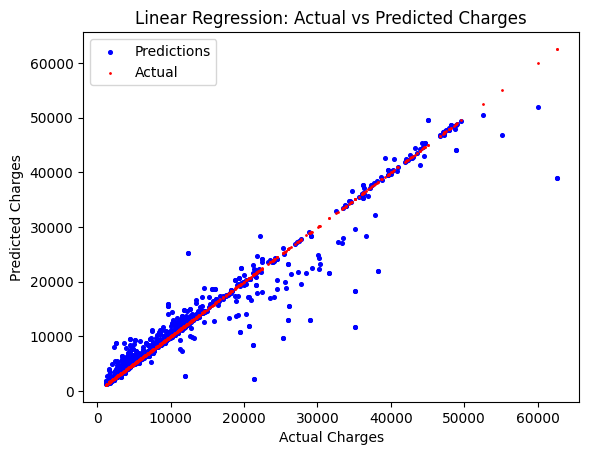

In [37]:
plt.scatter(y_test, predrandom, color='blue', label='Predictions', s=7)
plt.scatter(y_test, y_test, color='red', label='Actual',s=1)

plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Linear Regression: Actual vs Predicted Charges')
plt.legend()
plt.show()

In [38]:
## For train
pred2_tr = model1.predict(X_train)

error = []
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error,r2_score
import numpy as np

#MAE
mae = mean_absolute_error(y_train,pred2_tr)
error.append(mae)

#MAPE
mape = mean_absolute_percentage_error(y_train,pred2_tr)
error.append(mape)

#r2
rs = r2_score(y_train,pred2_tr)
error.append(rs)

err = pd.DataFrame(error).T
err.columns=['MAE','MAPE','R2']
err

,MAE,MAPE,R2
0,569.293028,0.074377,0.989725


In [39]:
adR2 = 1- ( ((1-rs) * (670-1)) / (670-1-10))
adR2

0.9895692410019257

#### Decision Tree


In [40]:
from sklearn.tree import DecisionTreeRegressor  
dt = DecisionTreeRegressor(random_state = 0)  
model3 = dt.fit(X_train, y_train) 

In [41]:
predTree = model3.predict(X_test)

In [42]:
error3 = []
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error,r2_score
import numpy as np
#MAE
mae = mean_absolute_error(y_test,predTree)
error3.append(mae)

#MAPE
mape = mean_absolute_percentage_error(y_test,predTree)
error3.append(mape)

#r2
rs = r2_score(y_test,predTree)
error3.append(rs)
error3

[918.9440110543841, 0.08359960119313672, 0.915105733643425]

In [43]:
err3 = pd.DataFrame(error3).T
err3.columns=['MAE','MAPE','R2']
err3

,MAE,MAPE,R2
0,918.944011,0.0836,0.915106


In [44]:
adR2 = 1- ( ((1-rs) * (670-1)) / (670-1-10))
adR2

0.9138175050188942

In [45]:
## For train
pred3_tr = model3.predict(X_train)

error = []
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error,r2_score
import numpy as np

#MAE
mae = mean_absolute_error(y_train,pred3_tr)
error.append(mae)

#MAPE
mape = mean_absolute_percentage_error(y_train,pred3_tr)
error.append(mape)

#r2
rs = r2_score(y_train,pred3_tr)
error.append(rs)

err = pd.DataFrame(error).T
err.columns=['MAE','MAPE','R2']
err

,MAE,MAPE,R2
0,13.684966,0.004677,0.999402


In [46]:
adR2 = 1- ( ((1-rs) * (670-1)) / (670-1-10))
adR2

0.9993932965307863

### Gradient Boost

In [47]:
from sklearn.ensemble import GradientBoostingRegressor 

gb = GradientBoostingRegressor()
model4 = gb.fit(X_train, y_train)
predGb = model4.predict(X_test)

In [48]:
error4 = []
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error,r2_score
import numpy as np
#MAE
mae = mean_absolute_error(y_test,predGb)
error4.append(mae)

#MAPE
mape = mean_absolute_percentage_error(y_test,predGb)
error4.append(mape)

#r2
rs = r2_score(y_test,predGb)
error4.append(rs)


err3 = pd.DataFrame(error4).T
err3.columns=['MAE','MAPE','R2']
err3

,MAE,MAPE,R2
0,2214.907256,0.258663,0.878366


In [49]:
adR2 = 1- ( ((1-rs) * (670-1)) / (670-1-10))
adR2

0.8765204205083509

In [50]:
## For train
pred4_tr = model4.predict(X_train)

error = []
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error,r2_score
import numpy as np

#MAE
mae = mean_absolute_error(y_train,pred4_tr)
error.append(mae)

#MAPE
mape = mean_absolute_percentage_error(y_train,pred4_tr)
error.append(mape)

#r2
rs = r2_score(y_train,pred4_tr)
error.append(rs)

err = pd.DataFrame(error).T
err.columns=['MAE','MAPE','R2']
err

,MAE,MAPE,R2
0,2051.282176,0.259374,0.899437


In [51]:
adR2 = 1- ( ((1-rs) * (670-1)) / (670-1-10))
adR2

0.89791070738989